In [189]:
!pip install scikit-learn


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [190]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import  sklearn


In [191]:
#for increasing the figure size
#%matplotlib inline
#plt.rcParams['figure.figsize']=(10,10)

In [192]:
data=pd.read_csv(r'C:\Users\Admin\Desktop\git\heart-stroke-detection\healthcare-dataset-stroke-data.csv')

In [193]:
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [194]:
#stroke vale is dependant variable other are feature on which it depend

#**exploratory data analysis**

In [195]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [196]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [197]:
#filling null values

In [198]:
data['bmi'].value_counts()

bmi
28.7    41
28.4    38
27.7    37
26.7    37
26.1    37
        ..
46.8     1
58.1     1
50.4     1
54.1     1
14.9     1
Name: count, Length: 418, dtype: int64

In [199]:
data['bmi'].describe()

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

In [200]:
data['bmi']=data['bmi'].fillna(data['bmi'].mean())

In [201]:
data.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [202]:
data.drop('id',axis=1,inplace=True)

In [203]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


#**outlier removal**

<Axes: >

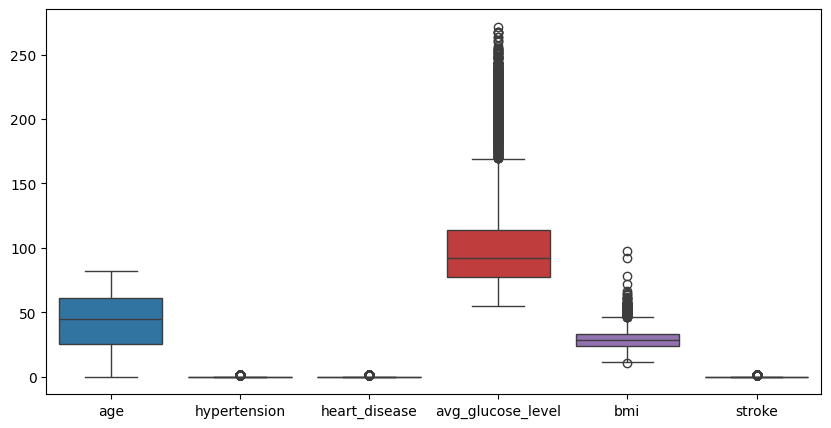

In [204]:
plt.figure(figsize=(10,5))
sns.boxplot(data=data)

In [205]:
data['avg_glucose_level'].describe()

count    5110.000000
mean      106.147677
std        45.283560
min        55.120000
25%        77.245000
50%        91.885000
75%       114.090000
max       271.740000
Name: avg_glucose_level, dtype: float64

In [206]:
data[data['avg_glucose_level']>114.090000]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.000000,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5071,Male,81.0,0,0,Yes,Private,Rural,135.32,35.800000,Unknown,0
5076,Female,34.0,0,0,Yes,Private,Rural,174.37,23.000000,never smoked,0
5086,Female,51.0,0,0,Yes,Private,Urban,152.56,21.800000,Unknown,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0


In [207]:
data['avg_glucose_level'].value_counts()

avg_glucose_level
93.88     6
91.68     5
72.49     5
91.85     5
84.10     5
         ..
73.73     1
77.88     1
78.03     1
205.26    1
185.27    1
Name: count, Length: 3979, dtype: int64

In [208]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [209]:
#we have 6 objects in here the categorical data type 
#encoding accordig to type of categorical data type 
data['work_type'].value_counts()

work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64

In [210]:
data['Residence_type'].value_counts()


Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64

In [211]:
data['smoking_status'].value_counts()


smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64

#**label encoding**


In [212]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()

In [213]:
data['gender']=enc.fit_transform(data['gender'])
data['gender']
#it encoded the gender male feamle to 0/1

0       1
1       0
2       1
3       0
4       0
       ..
5105    0
5106    0
5107    0
5108    1
5109    0
Name: gender, Length: 5110, dtype: int64

In [214]:
data['smoking_status']=enc.fit_transform(data['smoking_status'])
data['smoking_status']

0       1
1       2
2       2
3       3
4       2
       ..
5105    2
5106    2
5107    2
5108    1
5109    0
Name: smoking_status, Length: 5110, dtype: int64

In [215]:
data['work_type']=enc.fit_transform(data['work_type'])
data['work_type']

0       2
1       3
2       2
3       2
4       3
       ..
5105    2
5106    3
5107    3
5108    2
5109    0
Name: work_type, Length: 5110, dtype: int64

In [216]:
data['Residence_type']=enc.fit_transform(data['Residence_type'])
data['Residence_type']

0       1
1       0
2       0
3       1
4       0
       ..
5105    1
5106    1
5107    0
5108    0
5109    1
Name: Residence_type, Length: 5110, dtype: int64

In [217]:
data['ever_married']=enc.fit_transform(data['ever_married'])
data['ever_married']	

0       1
1       1
2       1
3       1
4       1
       ..
5105    1
5106    1
5107    1
5108    1
5109    1
Name: ever_married, Length: 5110, dtype: int64

In [218]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.75,28.893237,2,0
5106,0,81.0,0,0,1,3,1,125.20,40.000000,2,0
5107,0,35.0,0,0,1,3,0,82.99,30.600000,2,0
5108,1,51.0,0,0,1,2,0,166.29,25.600000,1,0


#**splitting the data for train and test**

In [219]:
X=data.drop('stroke',axis=1)
Y=data['stroke']

In [220]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(X,Y,test_size=0.2,random_state=101)

In [221]:
x_train

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
3831,0,55.0,0,0,0,3,0,67.10,31.400000,2
5085,0,72.0,0,0,1,2,1,83.89,33.100000,1
1593,1,31.0,0,0,1,2,1,71.31,25.800000,2
1324,0,80.0,0,0,1,0,1,84.86,28.893237,0
123,1,56.0,1,0,1,2,0,249.31,35.800000,2
...,...,...,...,...,...,...,...,...,...,...
4171,1,45.0,0,0,1,2,1,115.52,33.900000,1
599,0,59.0,1,0,1,2,1,204.86,30.800000,2
1361,0,59.0,0,0,1,2,1,89.96,28.100000,0
1547,1,59.0,0,1,1,3,0,194.98,30.400000,0


In [222]:
y_train

3831    0
5085    0
1593    0
1324    0
123     1
       ..
4171    0
599     0
1361    0
1547    0
4959    0
Name: stroke, Length: 4088, dtype: int64

In [223]:
x_test


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
5031,0,20.0,0,0,0,2,0,117.59,17.1,2
4017,0,44.0,0,0,1,2,0,110.41,30.5,3
744,0,71.0,1,0,1,2,1,194.62,31.6,2
1799,1,34.0,0,0,1,2,1,108.12,22.2,0
2314,1,82.0,0,0,1,2,1,89.83,24.7,3
...,...,...,...,...,...,...,...,...,...,...
4795,1,62.0,0,0,1,3,0,136.18,32.2,0
4641,0,45.0,0,0,1,0,0,84.99,35.4,0
1320,0,58.0,0,1,1,2,0,144.16,26.0,3
1098,0,77.0,0,0,1,2,0,75.06,22.0,0


In [224]:
y_test

5031    0
4017    0
744     0
1799    0
2314    0
       ..
4795    0
4641    0
1320    0
1098    0
4634    0
Name: stroke, Length: 1022, dtype: int64

#**normalize**


In [225]:
#scale down data  of feature to same scale 
# as some feature may range 0-1 or other 0-100

In [226]:
data.describe()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,0.414286,43.226614,0.097456,0.054012,0.656164,2.167710,0.508023,106.147677,28.893237,1.376908,0.048728
std,0.493044,22.612647,0.296607,0.226063,0.475034,1.090293,0.499985,45.283560,7.698018,1.071534,0.215320
min,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000,0.000000
25%,0.000000,25.000000,0.000000,0.000000,0.000000,2.000000,0.000000,77.245000,23.800000,0.000000,0.000000
50%,0.000000,45.000000,0.000000,0.000000,1.000000,2.000000,1.000000,91.885000,28.400000,2.000000,0.000000
75%,1.000000,61.000000,0.000000,0.000000,1.000000,3.000000,1.000000,114.090000,32.800000,2.000000,0.000000
max,2.000000,82.000000,1.000000,1.000000,1.000000,4.000000,1.000000,271.740000,97.600000,3.000000,1.000000


In [227]:
from sklearn.preprocessing import StandardScaler 
std=StandardScaler()


In [228]:
x_train_std=std.fit_transform(x_train)
#fit_transform and Transform?data lekage
#to understand the training data not the test
x_test_std=std.transform(x_test)

In [229]:
import pickle
import os


In [230]:
# save the scaler object

In [231]:
scaler_path=os.path.join('C:/Users/Admin/Desktop/git/heart-stroke-detection/model','scalar.pkl')
with open(scaler_path,'wb') as scaler_file:
     pickle.dump(std,scaler_file)

In [232]:
x_train_std

array([[-0.83822764,  0.52508975, -0.32887595, ..., -0.86380214,
         0.32750249,  0.58675012],
       [-0.83822764,  1.27625065, -0.32887595, ..., -0.49693827,
         0.5478543 , -0.34367443],
       [ 1.19059095, -0.53537271, -0.32887595, ..., -0.77181304,
        -0.39836227,  0.58675012],
       ...,
       [-0.83822764,  0.70183349, -0.32887595, ..., -0.36430791,
        -0.10023924, -1.27409897],
       [ 1.19059095,  0.70183349, -0.32887595, ...,  1.93039389,
         0.19788379, -1.27409897],
       [-0.83822764,  0.30416007, -0.32887595, ..., -0.96147227,
        -0.70944717,  0.58675012]])

In [233]:
x_test_std

array([[-0.83822764, -1.021418  , -0.32887595, ...,  0.23941148,
        -1.52604504,  0.58675012],
       [-0.83822764,  0.03904446, -0.32887595, ...,  0.08252747,
         0.21084566,  1.51717466],
       [-0.83822764,  1.23206472,  3.04066013, ...,  1.92252784,
         0.35342624,  0.58675012],
       ...,
       [-0.83822764,  0.65764755, -0.32887595, ...,  0.81996973,
        -0.37243853,  1.51717466],
       [-0.83822764,  1.49718033, -0.32887595, ..., -0.68987501,
        -0.89091336, -1.27409897],
       [ 1.19059095,  1.49718033, -0.32887595, ..., -0.26117525,
         0.61266365, -1.27409897]])

#**Training**

#**decison tree**

In [234]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()


In [235]:
dt.fit(x_train_std,y_train)

DecisionTreeClassifier()

In [236]:
dt.feature_importances_

array([0.03695222, 0.16353733, 0.01858357, 0.0226346 , 0.00655284,
       0.04102032, 0.05099437, 0.32220445, 0.25791542, 0.07960489])

In [237]:
x_train.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status'],
      dtype='object')

In [238]:
dt_pred=dt.predict(x_test_std)
dt_pred

array([0, 0, 1, ..., 0, 0, 0])

In [239]:
y_test

5031    0
4017    0
744     0
1799    0
2314    0
       ..
4795    0
4641    0
1320    0
1098    0
4634    0
Name: stroke, Length: 1022, dtype: int64

In [240]:
from sklearn.metrics import accuracy_score

In [241]:
dt_ac=accuracy_score(y_test,dt_pred)
dt_ac

0.9099804305283757

In [266]:
import joblib
model_path=os.path.join('C:/Users/Admin/Desktop/git/heart-stroke-detection','model/dt.sav')
joblib.dump(dt,model_path)

['C:/Users/Admin/Desktop/git/heart-stroke-detection\\model/dt.sav']

#**Logistic Regression**

In [242]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [243]:
lr.fit(x_train_std,y_train)

LogisticRegression()

In [244]:
lr_pred=lr.predict(x_test_std)
lr_pred

array([0, 0, 0, ..., 0, 0, 0])

In [245]:
y_test

5031    0
4017    0
744     0
1799    0
2314    0
       ..
4795    0
4641    0
1320    0
1098    0
4634    0
Name: stroke, Length: 1022, dtype: int64

In [246]:
lr_ac=accuracy_score(y_test,lr_pred)
lr_ac

0.9471624266144814

#**KNN**

In [247]:
 from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [248]:
knn.fit(x_train_std,y_train)


KNeighborsClassifier()

In [249]:
knn_pred=knn.predict(x_test_std)
knn_pred

array([0, 0, 0, ..., 0, 0, 0])

In [250]:
knn_ac=accuracy_score(y_test,knn_pred)
knn_ac

0.9452054794520548

#**RandomForest**

In [251]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [252]:
rf.fit(x_train_std,y_train)

RandomForestClassifier()

In [253]:
rf_pred=rf.predict(x_test_std)

In [254]:
rf_ac=accuracy_score(y_test,rf_pred)
rf_ac

0.9471624266144814

#**SVM support vector machine**

In [255]:
from sklearn.svm import SVC

In [256]:
sv=SVC()

In [257]:
sv.fit(x_train_std,y_train)

SVC()

In [258]:
sv_pred=sv.predict(x_test_std)

In [259]:
sv_ac=accuracy_score(y_test,sv_pred)
sv_ac

0.9471624266144814

In [260]:
lr_ac

0.9471624266144814

Text(0, 0.5, 'Accuracy')

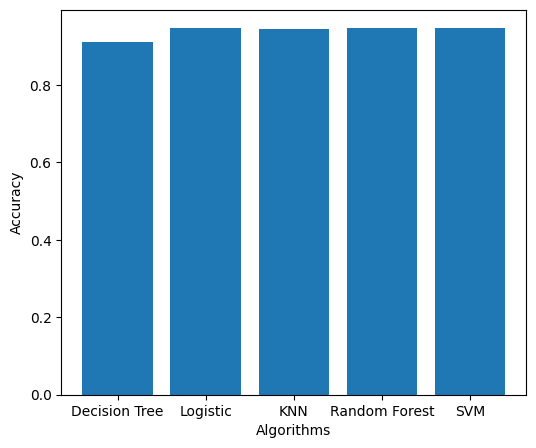

In [261]:
plt.figure(figsize=(6, 5))
plt.bar(['Decision Tree','Logistic','KNN','Random Forest','SVM'],[dt_ac,lr_ac,knn_ac,rf_ac,sv_ac])
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")